In [2]:
#predicting apple stock price

import yfinance as yf

In [3]:
ticker="AAPL"

stock_data=yf.download(ticker, start= "2020-01-01", end ="2025-03-01")

print(stock_data)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2020-01-02   72.716064   72.776591   71.466805   71.721011  135480400
2020-01-03   72.009109   72.771737   71.783954   71.941321  146322800
2020-01-06   72.582916   72.621654   70.876083   71.127873  118387200
2020-01-07   72.241554   72.849231   72.021238   72.592601  108872000
2020-01-08   73.403648   73.706279   71.943759   71.943759  132079200
...                ...         ...         ...         ...        ...
2025-02-24  247.100006  248.860001  244.419998  244.929993   51326400
2025-02-25  247.039993  250.000000  244.910004  248.000000   48013300
2025-02-26  240.360001  244.979996  239.130005  244.330002   44433600
2025-02-27  237.300003  242.460007  237.059998  239.410004   41153600
2025-02-28  241.839996  242.089996  230.199997  236.949997   56796200

[1297 rows x 5 colu

In [4]:
#checking if we are having any null values
print(stock_data.isnull().sum())

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


In [5]:
df=stock_data
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.716064,72.776591,71.466805,71.721011,135480400
2020-01-03,72.009109,72.771737,71.783954,71.941321,146322800
2020-01-06,72.582916,72.621654,70.876083,71.127873,118387200
2020-01-07,72.241554,72.849231,72.021238,72.592601,108872000
2020-01-08,73.403648,73.706279,71.943759,71.943759,132079200
...,...,...,...,...,...
2025-02-24,247.100006,248.860001,244.419998,244.929993,51326400
2025-02-25,247.039993,250.000000,244.910004,248.000000,48013300


In [6]:

df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.716064,72.776591,71.466805,71.721011,135480400
2020-01-03,72.009109,72.771737,71.783954,71.941321,146322800
2020-01-06,72.582916,72.621654,70.876083,71.127873,118387200
2020-01-07,72.241554,72.849231,72.021238,72.592601,108872000
2020-01-08,73.403648,73.706279,71.943759,71.943759,132079200


In [7]:
#Simple moving averages for 10 day closing and 50 day closing
stock_data["SMA_10"]=stock_data["Close"].rolling(window=10).mean()
stock_data["SMA_50"]=stock_data["Close"].rolling(window=50).mean()

In [8]:
#EMA : Exponential Moving Average
stock_data["EMA_10"]=stock_data["Close"].ewm(span=10,adjust="False").mean()

<function matplotlib.pyplot.show(close=None, block=None)>

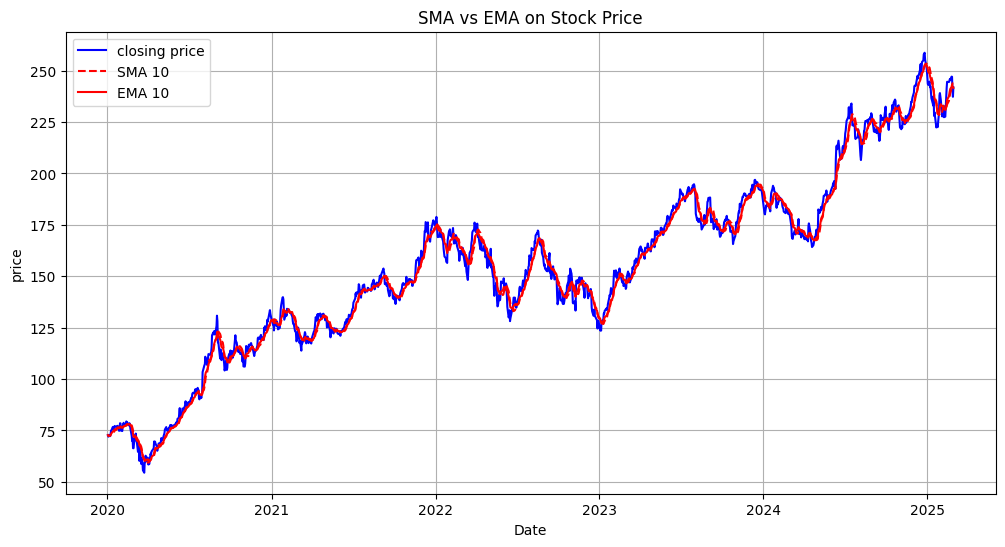

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(stock_data["Close"],label="closing price", color="blue")

#plot 10 day SMA and EMA

plt.plot(stock_data["SMA_10"], label="SMA 10", color="red" , linestyle="dashed")

plt.plot(stock_data["EMA_10"], label="EMA 10" ,color="red")

plt.xlabel("Date")
plt.ylabel("price")
plt.title("SMA vs EMA on Stock Price")
plt.legend()
plt.grid(True)
plt.show
